In [41]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# firdaus251@gmail.com
# %cd /content/gdrive/My\ Drive/S2/IE\ 600\ M.Sc.\ Thesis/Gearbox

In [ ]:
# !git clone https://github.com/cathysiyu/Mechanical-datasets.git

In [ ]:
# def label(filename):
#     if 'Health' in filename:
#         return 0
#     elif 'Chipped' in filename:
#         return 1
#     elif 'Miss' in filename:
#         return 2
#     elif 'Root' in filename:
#         return 3
#     elif 'Surface' in filename:
#         return 4

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# from pathlib import Path
# import re

In [42]:
%cd /content/gdrive/My\ Drive/S2/IE\ 600\ M.Sc.\ Thesis/Gearbox/Mechanical-datasets/gearbox/gearset/

/content/gdrive/My Drive/S2/IE 600 M.Sc. Thesis/Gearbox/Mechanical-datasets/gearbox/gearset


In [ ]:
# data_path = Path('.')

In [ ]:
# %%time
# dic_all = {}
# for filepath in data_path.glob('*.csv'):
#     key_name = str(filepath).split('\\')[-1]
#     df = pd.read_csv(filepath)
#     df = df.iloc[np.r_[11:1048571]]
#     df = pd.DataFrame([df.iloc[i][0].split('\t') for i in range(df.reset_index(drop=True).shape[0])])
#     df = df.drop([8], axis=1)
#     df['label'] = label(str(filepath))
#     dic_all[key_name] = df

In [ ]:
# %%time
# df = pd.DataFrame([])
# for i in dic_all:
#     df = pd.concat([df,dic_all[i]])
# df

In [ ]:
# %%time
# df.to_csv('gearbox.csv')

In [43]:
def append_signal(df, segment_length):
    dic = {}
    idx = 0
    idxd = 0
    for i in range(int(df.shape[0] // (segment_length / (df.shape[1] - 1)))):
        n_rows = int(segment_length / (df.shape[1] - 1))
        tmp = np.array([])
        for j in range(n_rows):
            tmp = np.append(tmp, df.iloc[idx, :-1])
            label = df.iloc[idx,-1]
            idx += 1
        dic[idxd] = {
            'signal': tmp,
            'label': label
        }
        idxd += 1
    df_tmp = pd.DataFrame.from_dict(dic,orient='index')
    df_output = pd.concat(
                [pd.DataFrame(np.vstack(df_tmp["signal"])),
                 df_tmp[['label']]
                ], 
                axis=1 )
    return df_output

In [ ]:
# %%time
# wk = append_signal(df, 1600)
# wk

In [ ]:
# %%time
# wk.to_csv('gearbox_1600.csv')

In [44]:
%%time
# Data science libraries
import scipy.io
from scipy.io import savemat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import re
from sklearn.metrics import confusion_matrix

# Pytorch
import torch
from torch import nn
from torch.nn import functional as F
from torch import Tensor
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
from torch.nn.modules.loss import CrossEntropyLoss

CPU times: user 52 µs, sys: 0 ns, total: 52 µs
Wall time: 56 µs


In [45]:
%%time
wk = pd.read_csv('gearbox.csv')
wk

CPU times: user 8.63 s, sys: 960 ms, total: 9.59 s
Wall time: 10.5 s


In [46]:
wk = wk.iloc[:,1:]
wk

,0,1,2,3,4,5,6,7,label
0,-0.166990,0.000503,0.000496,0.001961,-0.009605,-0.001930,-0.004188,-0.003593,1
1,-0.166672,0.002112,0.002393,0.003843,-0.012335,-0.014278,0.003805,-0.003625,1
2,-0.168072,0.003276,0.001824,0.002321,-0.013756,-0.010800,0.006691,0.001322,1
3,-0.167397,0.002187,0.000870,0.005610,-0.011922,-0.006158,0.006317,0.004017,1
4,-0.167269,0.000864,0.002501,-0.000274,-0.007973,-0.003726,0.000799,-0.003133,1
...,...,...,...,...,...,...,...,...,...
10485595,-0.096711,0.001663,0.009999,0.009701,0.010765,-0.032554,-0.004383,0.030427,4
10485596,-0.117769,-0.003766,-0.003173,-0.008997,0.008203,-0.024344,-0.001603,0.023708,4
10485597,-0.125676,0.000100,-0.006078,0.007027,-0.015857,0.001858,0.003486,-0.038427,4
10485598,-0.132912,-0.008304,0.009670,0.005668,-0.034431,-0.006635,0.024041,-0.018816,4


In [ ]:
n_rows = 1048560

In [47]:
%%time
d = {}
for i in range(10):
    d['a{0}'.format(i)] = wk.iloc[i*n_rows:(i+1)*n_rows]

CPU times: user 873 µs, sys: 0 ns, total: 873 µs
Wall time: 882 µs


In [52]:
%%time
dd = {}
for i in range(10):
    dd['a{}'.format(i)] = append_signal(d['a{}'.format(i)], 1600)

CPU times: user 1h 12min 7s, sys: 5min 46s, total: 1h 17min 53s
Wall time: 1h 12min 21s


In [56]:
wkwkwk = pd.DataFrame([])
for i in dd:
    wkwkwk = pd.concat([wkwkwk,dd[i]], axis=0)

In [58]:
%%time
wkwkwk.to_csv('gearbox_1600_ok.csv')

In [63]:
wkwkwk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,label
0,-0.166990,0.000503,0.000496,0.001961,-0.009605,-0.001930,-0.004188,-0.003593,-0.166672,0.002112,0.002393,0.003843,-0.012335,-0.014278,0.003805,-0.003625,-0.168072,0.003276,0.001824,0.002321,-0.013756,-0.010800,0.006691,0.001322,-0.167397,0.002187,0.000870,0.005610,-0.011922,-0.006158,0.006317,0.004017,-0.167269,0.000864,0.002501,-0.000274,-0.007973,-0.003726,0.000799,-0.003133,...,0.004307,-0.001523,-0.001957,0.007362,-0.005063,0.004883,0.001014,-0.165890,0.003058,0.000736,0.003064,0.007229,-0.003247,-0.000913,0.001471,-0.164526,0.000125,0.000404,0.003482,0.005091,-0.000756,-0.000482,0.002694,-0.167673,-0.001067,-0.000404,-0.002841,0.002593,-0.002176,-0.002798,-0.003427,-0.169846,0.002413,0.001577,0.002810,0.001550,0.003215,-0.006516,-0.006297,1
1,-0.170202,-0.001537,-0.000634,0.002918,0.003067,-0.002054,0.002491,-0.001354,-0.166199,0.000958,0.002571,-0.003273,0.002879,-0.002738,-0.001800,0.004760,-0.164349,0.003797,-0.002583,0.004766,-0.000319,-0.005027,-0.001099,0.005931,-0.162462,0.000569,0.003959,0.004450,-0.002919,-0.008571,0.004872,0.002028,-0.161756,0.003053,-0.004883,-0.002912,-0.000938,-0.005434,0.002531,-0.002586,...,-0.003651,-0.001613,-0.008396,0.009636,0.003273,-0.008202,-0.023249,-0.170549,0.003635,0.003405,0.005028,0.005492,-0.003413,0.001488,0.001037,-0.171037,-0.000347,0.001673,0.000311,0.011348,-0.017080,0.009515,0.024073,-0.169072,0.003345,-0.004230,-0.000901,0.019561,-0.017601,0.010616,0.024786,-0.163680,0.005854,-0.004432,0.009999,0.021507,-0.018655,0.011145,-0.001709,1
2,-0.165242,0.001490,-0.000380,-0.000206,0.014886,-0.004308,0.004696,-0.017110,-0.169846,-0.001564,-0.006975,-0.006545,0.007240,0.013074,-0.001839,-0.008441,-0.171285,-0.001146,0.008605,-0.000291,0.006317,0.011560,-0.012691,0.000072,-0.176054,-0.001051,-0.000072,-0.005729,0.010992,0.003281,-0.016693,0.005032,-0.177592,-0.000731,-0.001913,-0.000349,0.012566,-0.000895,-0.002148,0.010576,...,-0.000643,-0.001874,0.002393,-0.001413,-0.010589,0.002376,0.000849,-0.163919,0.001248,0.002267,0.001622,-0.003375,-0.005691,-0.000209,-0.000100,-0.165908,-0.000538,-0.002232,0.005848,-0.004001,-0.005914,0.004137,0.000352,-0.162795,-0.003035,0.002514,-0.000581,-0.002531,-0.006424,0.000945,-0.002036,-0.163901,0.002298,-0.000696,0.002671,0.001211,-0.008192,-0.005305,0.002571,1
3,-0.163976,-0.002890,0.003787,0.004954,0.001082,-0.012310,0.000126,-0.001671,-0.164812,-0.002314,0.001326,0.002117,-0.002290,-0.004389,0.003270,-0.000780,-0.163821,-0.001932,0.000757,0.002918,-0.003462,-0.008807,0.003046,-0.009866,-0.163902,-0.000594,0.006145,0.005692,-0.002066,-0.001539,-0.002145,0.007930,-0.166689,-0.004939,-0.003031,-0.000076,0.000179,-0.013505,-0.000051,0.010740,...,0.001125,0.002686,0.002505,-0.002775,-0.005242,-0.002292,-0.003917,-0.161980,0.001100,0.000757,0.000099,0.000557,-0.008148,0.003172,-0.000528,-0.161796,0.002252,-0.000031,0.002178,0.004033,-0.006913,0.004784,0.003306,-0.161905,0.003142,0.000439,0.003204,0.002233,-0.007201,0.002412,0.001061,-0.159950,0.001544,-0.000863,0.001243,-0.000932,-0.008265,0.001221,-0.002913,1
4,-0.163335,0.000869,0.001174,0.001355,-0.000247,-0.005565,0.000800,-0.002047,-0.167812,0.000722,0.003012,0.002608,0.002528,-0.003624,-0.001645,-0.001940,-0.168452,-0.000055,0.002776,0.001010,0.005159,-0.003967,-0.003005,-0.002587,-0.167682,-0.000373,0.000736,0.000366,0.002997,-0.004957,-0.000761,-0.002685,-0.168107,0.000368,0.001886,0.002167,-0.001191,-0.004203,-0.000837,-0.001478,...,0.002248,-0.000013,0.000883,-0.002767,-0.002525,-0.001495,-0.001562,-0.163399,0.002618,0.000755,-0.001831,-0.004503,-0.001419,0.001009,-0.000643,-0.164305,0.003215,-0.000761,-0.000325,-0.006503,-0.002184,0.001949,0.001019,-0.162226,0.002760,0.0008

In [60]:
%%time
df = pd.read_csv('gearbox_1600.csv')

CPU times: user 22.2 s, sys: 1.69 s, total: 23.9 s
Wall time: 26 s


In [61]:
df = df.iloc[:,1:]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,label
0,-0.166990,0.000503,0.000496,0.001961,-0.009605,-0.001930,-0.004188,-0.003593,-0.166672,0.002112,0.002393,0.003843,-0.012335,-0.014278,0.003805,-0.003625,-0.168072,0.003276,0.001824,0.002321,-0.013756,-0.010800,0.006691,0.001322,-0.167397,0.002187,0.000870,0.005610,-0.011922,-0.006158,0.006317,0.004017,-0.167269,0.000864,0.002501,-0.000274,-0.007973,-0.003726,0.000799,-0.003133,...,0.004307,-0.001523,-0.001957,0.007362,-0.005063,0.004883,0.001014,-0.165890,0.003058,0.000736,0.003064,0.007229,-0.003247,-0.000913,0.001471,-0.164526,0.000125,0.000404,0.003482,0.005091,-0.000756,-0.000482,0.002694,-0.167673,-0.001067,-0.000404,-0.002841,0.002593,-0.002176,-0.002798,-0.003427,-0.169846,0.002413,0.001577,0.002810,0.001550,0.003215,-0.006516,-0.006297,1
1,-0.170202,-0.001537,-0.000634,0.002918,0.003067,-0.002054,0.002491,-0.001354,-0.166199,0.000958,0.002571,-0.003273,0.002879,-0.002738,-0.001800,0.004760,-0.164349,0.003797,-0.002583,0.004766,-0.000319,-0.005027,-0.001099,0.005931,-0.162462,0.000569,0.003959,0.004450,-0.002919,-0.008571,0.004872,0.002028,-0.161756,0.003053,-0.004883,-0.002912,-0.000938,-0.005434,0.002531,-0.002586,...,-0.003651,-0.001613,-0.008396,0.009636,0.003273,-0.008202,-0.023249,-0.170549,0.003635,0.003405,0.005028,0.005492,-0.003413,0.001488,0.001037,-0.171037,-0.000347,0.001673,0.000311,0.011348,-0.017080,0.009515,0.024073,-0.169072,0.003345,-0.004230,-0.000901,0.019561,-0.017601,0.010616,0.024786,-0.163680,0.005854,-0.004432,0.009999,0.021507,-0.018655,0.011145,-0.001709,1
2,-0.165242,0.001490,-0.000380,-0.000206,0.014886,-0.004308,0.004696,-0.017110,-0.169846,-0.001564,-0.006975,-0.006545,0.007240,0.013074,-0.001839,-0.008441,-0.171285,-0.001146,0.008605,-0.000291,0.006317,0.011560,-0.012691,0.000072,-0.176054,-0.001051,-0.000072,-0.005729,0.010992,0.003281,-0.016693,0.005032,-0.177592,-0.000731,-0.001913,-0.000349,0.012566,-0.000895,-0.002148,0.010576,...,-0.000643,-0.001874,0.002393,-0.001413,-0.010589,0.002376,0.000849,-0.163919,0.001248,0.002267,0.001622,-0.003375,-0.005691,-0.000209,-0.000100,-0.165908,-0.000538,-0.002232,0.005848,-0.004001,-0.005914,0.004137,0.000352,-0.162795,-0.003035,0.002514,-0.000581,-0.002531,-0.006424,0.000945,-0.002036,-0.163901,0.002298,-0.000696,0.002671,0.001211,-0.008192,-0.005305,0.002571,1
3,-0.163976,-0.002890,0.003787,0.004954,0.001082,-0.012310,0.000126,-0.001671,-0.164812,-0.002314,0.001326,0.002117,-0.002290,-0.004389,0.003270,-0.000780,-0.163821,-0.001932,0.000757,0.002918,-0.003462,-0.008807,0.003046,-0.009866,-0.163902,-0.000594,0.006145,0.005692,-0.002066,-0.001539,-0.002145,0.007930,-0.166689,-0.004939,-0.003031,-0.000076,0.000179,-0.013505,-0.000051,0.010740,...,0.001125,0.002686,0.002505,-0.002775,-0.005242,-0.002292,-0.003917,-0.161980,0.001100,0.000757,0.000099,0.000557,-0.008148,0.003172,-0.000528,-0.161796,0.002252,-0.000031,0.002178,0.004033,-0.006913,0.004784,0.003306,-0.161905,0.003142,0.000439,0.003204,0.002233,-0.007201,0.002412,0.001061,-0.159950,0.001544,-0.000863,0.001243,-0.000932,-0.008265,0.001221,-0.002913,1
4,-0.163335,0.000869,0.001174,0.001355,-0.000247,-0.005565,0.000800,-0.002047,-0.167812,0.000722,0.003012,0.002608,0.002528,-0.003624,-0.001645,-0.001940,-0.168452,-0.000055,0.002776,0.001010,0.005159,-0.003967,-0.003005,-0.002587,-0.167682,-0.000373,0.000736,0.000366,0.002997,-0.004957,-0.000761,-0.002685,-0.168107,0.000368,0.001886,0.002167,-0.001191,-0.004203,-0.000837,-0.001478,...,0.002248,-0.000013,0.000883,-0.002767,-0.002525,-0.001495,-0.001562,-0.163399,0.002618,0.000755,-0.001831,-0.004503,-0.001419,0.001009,-0.000643,-0.164305,0.003215,-0.000761,-0.000325,-0.006503,-0.002184,0.001949,0.001019,-0.162226,0.002760,0.0008

In [65]:
features = wkwkwk.columns[:-1]
labels = wkwkwk.columns[-1]
all_features = np.array(wkwkwk[features])
all_labels = np.array(wkwkwk[labels])
all_features.shape, all_labels.shape

((52420, 1600), (52420,))

In [66]:
def mean(data,no_elements):
    X=np.zeros((data.shape[0],data.shape[1]))
    for i in range(data.shape[1]):
        if i == data.shape[1]-1:
            X[:,i]=data[:,i]
        elif i+no_elements > data.shape[1]:
            X[:,i]=np.mean(data[:,i:-1],axis=1)
        else:
            X[:,i]=np.mean(data[:,i:i+no_elements],axis=1)
    return X
def median(data,no_elements):
    X=np.zeros((data.shape[0],data.shape[1]))
    for i in range(data.shape[1]):
        if i == data.shape[1]-1:
            X[:,i]=data[:,i]
        elif i+no_elements > data.shape[1]:
            X[:,i]=np.median(data[:,i:-1],axis=1)
        else:
            X[:,i]=np.median(data[:,i:i+no_elements],axis=1)
    return X
def sig_image(data,size):
    X=np.zeros((data.shape[0],size,size))
    for i in range(data.shape[0]):
        X[i]=(data[i,:].reshape(size,size))
    return X.astype(np.float16)

In [67]:
%%time
channel_mean = mean(all_features, 8)
channel_median = median(all_features, 8)

CPU times: user 21.6 s, sys: 344 ms, total: 21.9 s
Wall time: 21.8 s


In [68]:
%%time
x_n = sig_image(all_features, 40)
x_mean = sig_image(channel_mean, 40)
x_median = sig_image(channel_median, 40)

CPU times: user 2.94 s, sys: 621 ms, total: 3.56 s
Wall time: 3.56 s


In [69]:
x_n.shape, x_mean.shape, x_median.shape

((52420, 40, 40), (52420, 40, 40), (52420, 40, 40))

In [70]:
%%time
X=np.stack((x_n,x_mean,x_median),axis=1).astype(np.float16)

CPU times: user 243 ms, sys: 141 ms, total: 384 ms
Wall time: 379 ms


In [71]:
X.shape

(52420, 3, 40, 40)

In [72]:
# all_features = np.expand_dims(all_features[:,:,:], 1)
# all_features.shape

In [73]:
%%time
from sklearn.model_selection import train_test_split
trainx, testx, trainlabel, testlabel = train_test_split(X, all_labels, test_size=0.2)

CPU times: user 168 ms, sys: 1.33 ms, total: 169 ms
Wall time: 175 ms


In [74]:
sig_train, sig_test = trainx,testx
lab_train, lab_test = trainlabel,testlabel
sig_train = torch.from_numpy(sig_train)
sig_test = torch.from_numpy(sig_test)
lab_train= torch.from_numpy(lab_train)
lab_test = torch.from_numpy(lab_test)

In [75]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [76]:
label_t, count_t = lab_test.unique(return_counts = True)
print('Health: {:.4f}%, Chipped: {:.4f}%, Miss: {:.4f}%, Root: {:.4f}%, Surface: {:.4f}%'
        .format(count_t[0]/ np.sum(np.array(count_t)) * 100, 
                count_t[1]/ np.sum(np.array(count_t)) * 100, 
                count_t[2]/ np.sum(np.array(count_t)) * 100, 
                count_t[3]/ np.sum(np.array(count_t)) * 100, 
                count_t[4]/ np.sum(np.array(count_t)) * 100))

Health: 20.0401%, Chipped: 19.9351%, Miss: 20.0782%, Root: 19.5918%, Surface: 20.3548%


In [77]:
import torch.utils.data as data_utils
batch_size = 128 
train_tensor = data_utils.TensorDataset(sig_train, lab_train) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

In [78]:
%%time
import torch.utils.data as data_utils
batch_size = 1024
test_tensor = data_utils.TensorDataset(sig_test.to(device), lab_test.to(device)) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = True)

CPU times: user 2 s, sys: 1.8 s, total: 3.8 s
Wall time: 11.5 s


In [ ]:
del cnn

NameError: ignored

In [79]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # self.conv1 = nn.Conv2d(1, 32, kernel_size=4,stride=1,padding = 1)
        self.conv1 = nn.Conv2d(3, 32, kernel_size=4,stride=1,padding = 1)
        self.mp1 = nn.MaxPool2d(kernel_size=4,stride=2)
        self.conv2 = nn.Conv2d(32,64, kernel_size=4,stride =1)
        self.mp2 = nn.MaxPool2d(kernel_size=4,stride=2)
        self.fc1= nn.Linear(2304,256)
        # self.fc1= nn.Linear(5184,256)
        self.dp1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(256,5)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp1(self.conv1(x)))
        x = F.relu(self.mp2(self.conv2(x)))
        x = x.view(in_size,-1)
        x = F.relu(self.fc1(x))
        x = self.dp1(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)

In [80]:
%%time
cnn = CNN().double().to(device)

CPU times: user 16.8 ms, sys: 7.47 ms, total: 24.3 ms
Wall time: 172 ms


In [81]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
num_epochs = 100

In [ ]:
%%time
# 3 channels multisensors
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (signals, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        # Run the forward pass
        signals, labels = signals.to(device), labels.to(device)
        signals=signals
        labels=labels
        # outputs = cnn(signals.unsqueeze(1).double())
        outputs = cnn(signals.double())
        loss = criterion(outputs, labels.long())
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.long()).sum().item()
        acc_list.append(correct / total)

        # if (epoch+1) % 5 == 0 or epoch==0:
        print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%'
              .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                      (correct / total) * 100))
        

Streaming output truncated to the last 5000 lines.
Epoch [68/100], Step [229/328], Loss: 0.0092, Train Accuracy: 99.22%
Epoch [68/100], Step [230/328], Loss: 0.0038, Train Accuracy: 100.00%
Epoch [68/100], Step [231/328], Loss: 0.0008, Train Accuracy: 100.00%
Epoch [68/100], Step [232/328], Loss: 0.0094, Train Accuracy: 100.00%
Epoch [68/100], Step [233/328], Loss: 0.0158, Train Accuracy: 99.22%
Epoch [68/100], Step [234/328], Loss: 0.0278, Train Accuracy: 99.22%
Epoch [68/100], Step [235/328], Loss: 0.0024, Train Accuracy: 100.00%
Epoch [68/100], Step [236/328], Loss: 0.0043, Train Accuracy: 100.00%
Epoch [68/100], Step [237/328], Loss: 0.0010, Train Accuracy: 100.00%
Epoch [68/100], Step [238/328], Loss: 0.0064, Train Accuracy: 100.00%
Epoch [68/100], Step [239/328], Loss: 0.0060, Train Accuracy: 100.00%
Epoch [68/100], Step [240/328], Loss: 0.0033, Train Accuracy: 100.00%
Epoch [68/100], Step [241/328], Loss: 0.0233, Train Accuracy: 98.44%
Epoch [68/100], Step [242/328], Loss: 0.013

In [ ]:
torch.save(cnn,'cnnC3_gearbox_100epochs.pth')

In [ ]:
total_step = len(test_loader)
print(total_step)
loss_list_test = []
acc_list_test = []
pred_list = []
labels_list = []
with torch.no_grad():
    for i, (signals, labels) in enumerate(test_loader):
        # Run the forward pass
        signals, labels = signals.to(device), labels.to(device)
        signals=signals
        labels=labels
        outputs = cnn(signals.double())
        # pred_list.append(outputs)
        # labels_list.append(labels)
        loss = criterion(outputs, labels.long())
        loss_list_test.append(loss.item())
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.long()).sum().item()
        acc_list_test.append(correct / total)
        # if (epoch) % 1 == 0:
        print('Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
              .format(i + 1, total_step, loss.item(),
                      (correct / total) * 100))

11
Step [1/11], Loss: 0.0264, Accuracy: 99.12%
Step [2/11], Loss: 0.0326, Accuracy: 99.02%
Step [3/11], Loss: 0.0136, Accuracy: 99.51%
Step [4/11], Loss: 0.0221, Accuracy: 99.61%
Step [5/11], Loss: 0.0189, Accuracy: 99.41%
Step [6/11], Loss: 0.0077, Accuracy: 99.80%
Step [7/11], Loss: 0.0243, Accuracy: 99.32%
Step [8/11], Loss: 0.0423, Accuracy: 99.51%
Step [9/11], Loss: 0.0099, Accuracy: 99.71%
Step [10/11], Loss: 0.0159, Accuracy: 99.32%
Step [11/11], Loss: 0.0240, Accuracy: 98.78%


In [ ]:
# 1
np.mean(np.array(loss_list_test)), np.mean(np.array(acc_list_test)), np.std(np.array(acc_list_test))

(0.02161836251636839, 0.9937422048226164, 0.002918727536666369)

In [ ]:
def get_all_preds(model, loader):
    with torch.no_grad():
        all_preds = torch.tensor([]).to(device)
        all_labels = torch.tensor([]).to(device)
        for i, (signals, labels) in enumerate(loader):
            signals, labels = signals.to(device), labels.to(device)
            model.to(device)
            outputs = model(signals.double())
            all_preds = torch.cat((all_preds, outputs), dim=0)
            all_labels = torch.cat((all_labels, labels), dim=0)
    return all_preds, all_labels

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
%%time
test_preds, test_labels = get_all_preds(cnn, test_loader)

CPU times: user 83.5 ms, sys: 985 µs, total: 84.5 ms
Wall time: 85.1 ms


In [ ]:
preds_correct = get_num_correct(test_preds, test_labels)

print('total correct:', preds_correct)
print('accuracy:', preds_correct/len(test_labels))

total correct: 10426
accuracy: 0.9942780850658021


In [ ]:
stacked = torch.stack((test_labels, test_preds.argmax(dim=1)), dim=1).type(torch.int32)

In [ ]:
cmt = torch.zeros(5,5, dtype=torch.int32)
cmt

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl,pl] = cmt[tl,pl] +1

In [ ]:
cmt

tensor([[2167,    0,    0,    0,    0],
        [   0, 2086,    1,   13,    7],
        [  16,    0, 2054,    1,    1],
        [   4,    0,    1, 2066,    0],
        [   4,    2,    4,    6, 2053]], dtype=torch.int32)

In [ ]:
import itertools
# import numpy as np
# import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.rcParams.update({'font.size': 27})

In [ ]:
cm = confusion_matrix(test_labels.cpu(), test_preds.argmax(dim=1).cpu())
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[2167,    0,    0,    0,    0],
       [   0, 2086,    1,   13,    7],
       [  16,    0, 2054,    1,    1],
       [   4,    0,    1, 2066,    0],
       [   4,    2,    4,    6, 2053]])

Confusion matrix, without normalization
[[2167    0    0    0    0]
 [   0 2086    1   13    7]
 [  16    0 2054    1    1]
 [   4    0    1 2066    0]
 [   4    2    4    6 2053]]


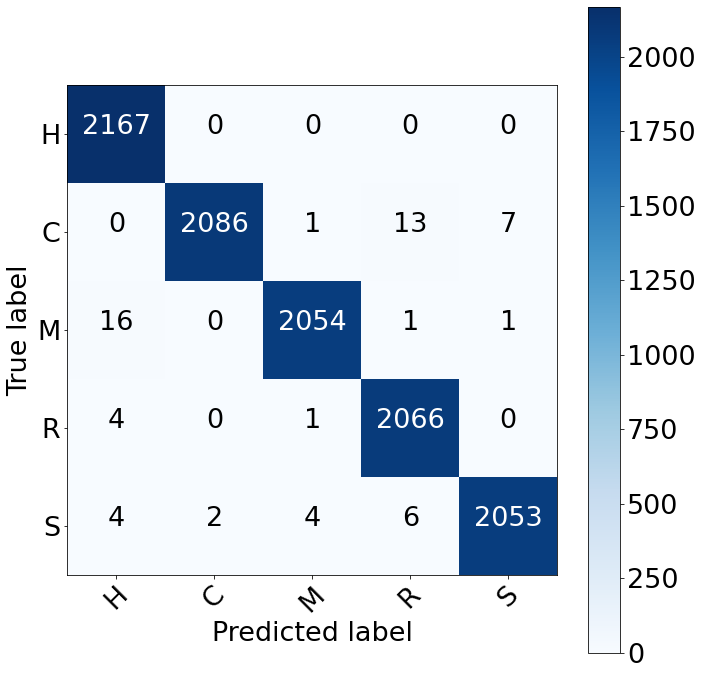

In [ ]:
names = ('H', 'C', 'M', 'R', 'S')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)